In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [54]:
#reading dataset
df=pd.read_csv('heart.csv')

In [160]:
#printing dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,0.6,2,0,2,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [57]:
#checking nulls 
print(df.isnull().sum())
print(df.isnull().values.any())
print(df.isnull().values.sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
False
0


In [58]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [59]:
#count male Vs female
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

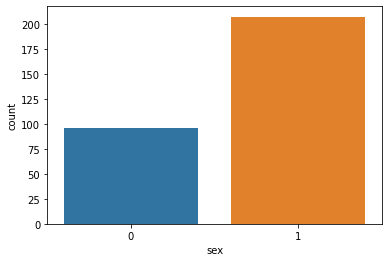

In [60]:
#Graphing male Vs female 
sns.countplot(x='sex',data=df)

In [61]:
df.drop(['exang'],axis=1,inplace=True)

<AxesSubplot:>

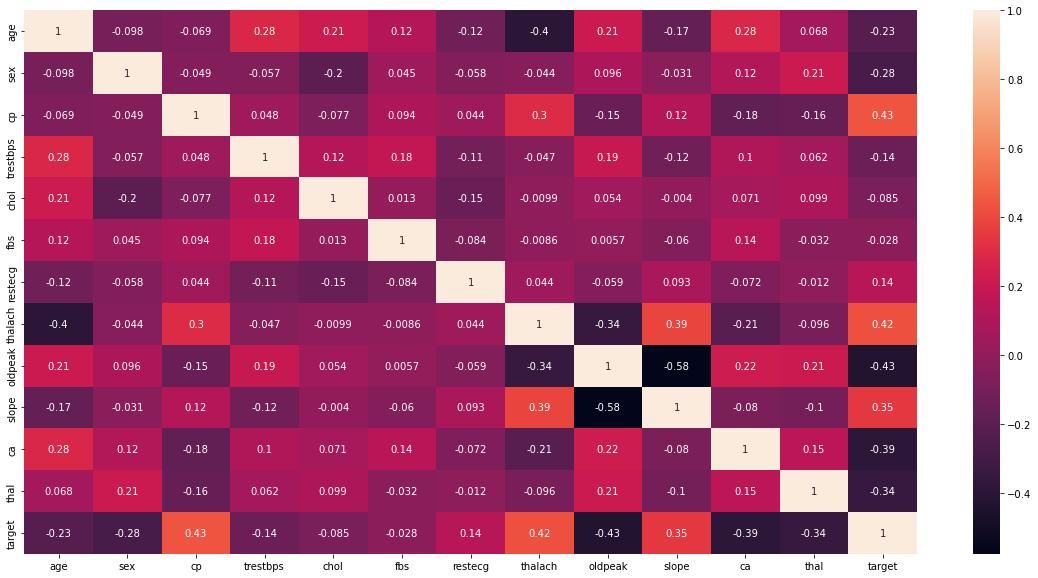

In [62]:
#correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [63]:
#observing females that have the disease
df[df['sex']==1]['target'].value_counts()       # 1 --> defective heart 
                                                # 0 --> Healthy Heart 

0    114
1     93
Name: target, dtype: int64

In [64]:
#obsercing males that have the disease
df[df['sex']==0]['target'].value_counts()       # 1 --> defective heart 
                                                # 0 --> Healthy Heart 

1    72
0    24
Name: target, dtype: int64

<AxesSubplot:xlabel='age', ylabel='sex'>

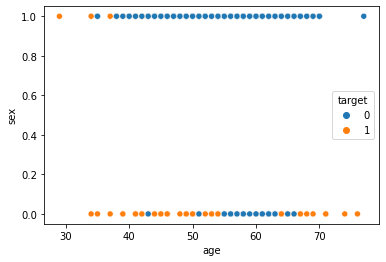

In [65]:
#Heart Disease Patients by Age and Gender
sns.scatterplot(x=df['age'],y=df['sex'],hue=df['target'])

In [66]:
#counting how many females have the disease by age
females=df[df['sex']==1]['age'].value_counts()
females

57    13
59    13
58    13
52    12
54    11
44     9
51     8
56     8
60     7
64     7
42     6
48     6
41     6
61     6
67     6
43     6
53     5
45     5
47     5
46     4
50     4
63     4
65     4
62     4
66     4
70     4
55     4
38     3
68     3
40     3
49     3
35     3
39     2
69     2
29     1
34     1
37     1
77     1
Name: age, dtype: int64

<AxesSubplot:>

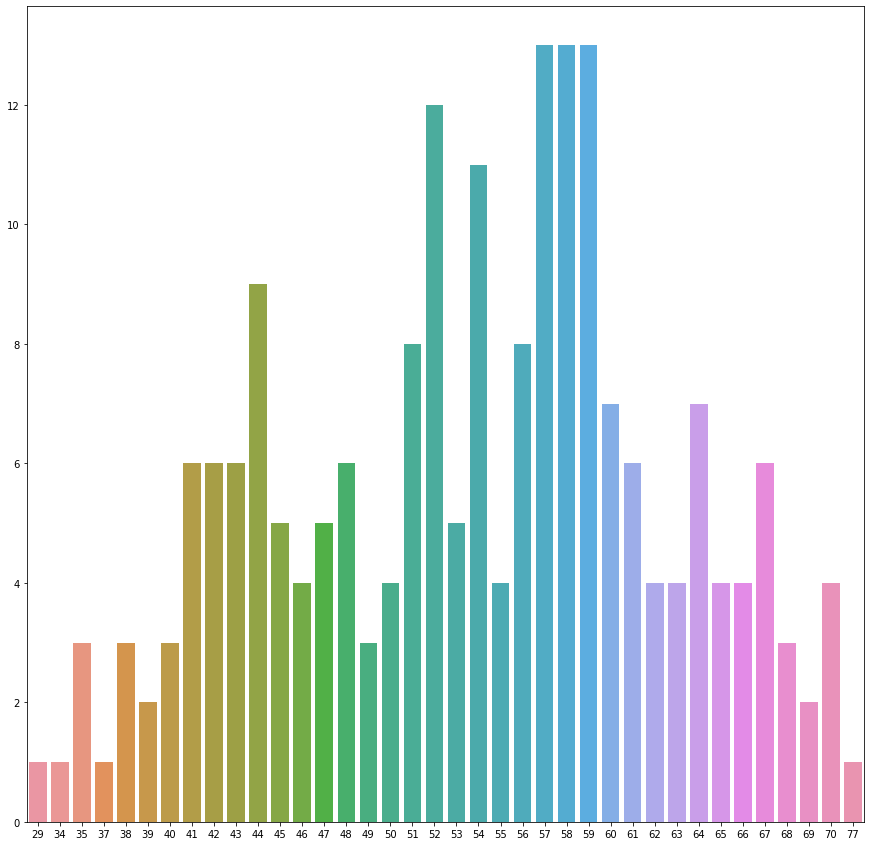

In [67]:
#Graphing how many females have the disease by age
plt.figure(figsize=(15,15))
sns.barplot(x=females.index,y=females.values)    #females of age 57-59 are more susceptible to the disease

In [68]:
#counting how many females have the disease by age
males=df[df['sex']==0]['age'].value_counts()
males

62    7
58    6
63    5
54    5
41    4
60    4
55    4
57    4
65    4
51    4
53    3
64    3
67    3
45    3
71    3
66    3
50    3
46    3
56    3
44    2
61    2
43    2
42    2
49    2
39    2
52    1
76    1
74    1
68    1
34    1
37    1
48    1
69    1
35    1
59    1
Name: age, dtype: int64

<AxesSubplot:>

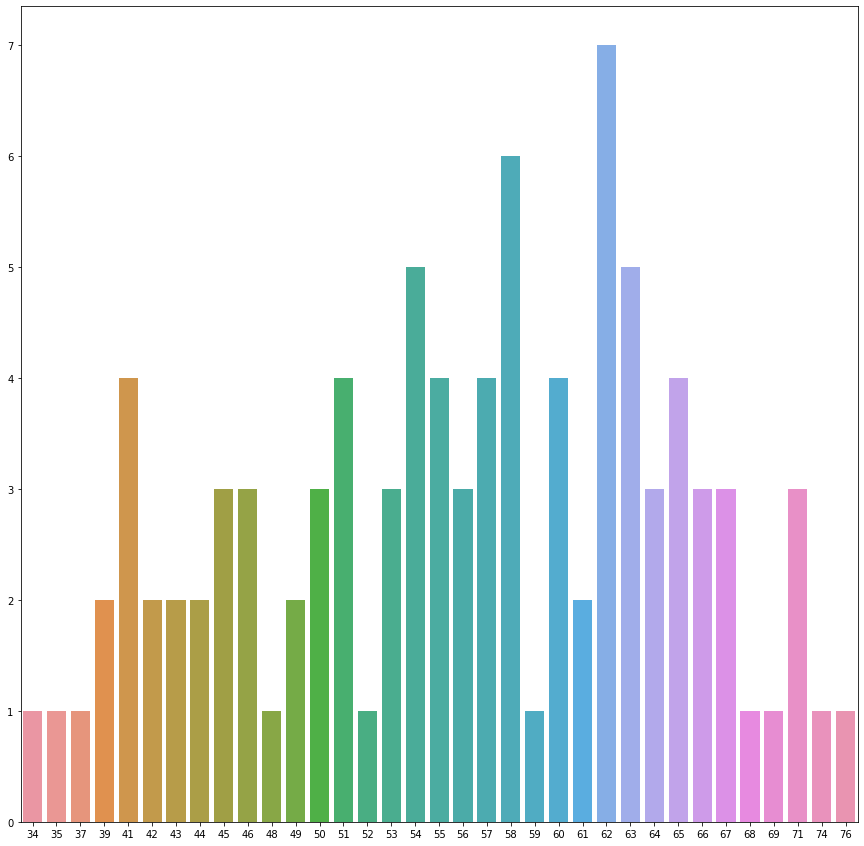

In [69]:
#Graphing how many males have the disease by age
plt.figure(figsize=(15,15))
sns.barplot(x=males.index,y=males.values)    #males of age 62 are more susceptible to the disease

Overall females are more susceptible to the disease than males 

In [158]:
#counting patients with age >= 50                               # 0--> Healthy heart 
df[df['age']>=50]['target'].value_counts() *100/df.shape[0]     # 1--> Defective Heart

0    36.963696
1    33.993399
Name: target, dtype: float64

In [164]:
#counting patients with age < 50                               # 0--> Healthy Heart
df[df['age']<50]['target'].value_counts() * 100 / df.shape[0]  # 1--> Defective Heart

1    20.462046
0     8.580858
Name: target, dtype: float64

People with age >= 50 are susceptible to the disease than those with age < 50

In [71]:
# Splitting 
X=df.iloc[:,:12]
y=df.iloc[:,12]

In [167]:
# Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 41) 

Applying Logistic Regression

In [73]:
classifier = LogisticRegression(random_state = 41)
classifier.fit(X_train, y_train)

C:\Users\nour\anaconda3\envs\pythontut\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=41)

In [74]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[30,  8],
       [ 6, 32]], dtype=int64)

In [75]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        38
           1       0.80      0.84      0.82        38

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



Applying Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_predictions = cross_val_predict(rf_model, X, y, cv=5)
print(confusion_matrix(y, rf_predictions))
rf_scores = cross_val_score(rf_model,X, y, scoring="recall", cv=5)
print("recall:", rf_scores.mean())

[[104  34]
 [ 25 140]]
recall: 0.8666666666666666


Applying Desicion Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.7236842105263158

Best accuracy and recall was for Random Forest then Logistic Regression